![logo](./img/LogoLine_horizon_C3S.png)

# Exploring Precipitation information in the GIRAFE dataset

This notebook-tutorial provides an introduction to the use of the Global Interpolated RAinFall Estimation ([GIRAFE](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-precipitation?tab=overview)) data record for climate studies.

<div style="text-align: justify"> The Precipitation (PRE) Essential Climate Variable (ECV) and the GIRAFE product are described in introduction. Then, a first use case provides an analysis of the time averaged global and seasonal climatological distributions of the Precipitation field as well as the monthly mean climatology. The second use case presents the time series and trend analysis of Precipitation. Step-by-step instructions are provided on data preparation; the use cases are extensively documented and each line of code is explained. </div>
<div style="text-align: justify"> The three figures below show some results from the use cases and illustrate the successful run of the code. </div>

![](./Figures/girafe_banner.png)

The notebook comprises the following sections:

## Table of content

* [1. Introduction](#intro)
* [2. Search, download and view data](#cdsapi)
    * [2.1. Import libraries](#import)
    * [2.2. Download Data Using CDS API](#download)
    * [2.3. View data](#view)
* [3. Climatology of precipitations](#climatology)
    * [3.1. Time averaged global climatological distribution of precipitations](#global_climatology)
    * [3.2. Time averaged seasonal climatological distribution of precipitations](#seasonal_climatology)
    * [3.3. Zonally averaged montly mean climatology of precipitations](#zonal_climatology)
* [4. Time series and trend analysis of precipitatons](#timeseries)
    * [4.1. Global time series of precipitations](#global_timeseries)
    * [4.2. Trend analysis and seasonal cycle of precipitation](#global_trend)
    * [4.3. Regional time series and trend analysis](#regional_trend)
* [5. Conclusion](#conclusion)

### How to access the notebooks


This tutorial is in the form of a [Jupyter notebook](https://jupyter.org/), written in [Python 3.9.4](https://www.python.org/downloads/release/python-394/). You will not need to install any software for the training as there are a number of free cloud-based services to create, edit, run and export Jupyter notebooks such as this. Here are some suggestions (simply click on one of the links below to run the notebook):

<style>
td, th {
   border: 1px solid white;
   border-collapse: collapse;
}
</style>
<table align="left">
  <tr>
    <th>Run the tutorial via free cloud platforms: </th>
    <th><a href="https://mybinder.org/v2/gh/ecmwf-projects/copernicus-training-c3s/main?labpath=Notebook_WVCombi.ipynb">
        <img src = "https://mybinder.org/badge.svg" alt = "Binder"></th>
    <th><a href="https://kaggle.com/kernels/welcome?src=https://github.com/ecmwf-projects/copernicus-training-c3s/blob/main/Notebook_WVCombi.ipynb">
        <img src = "https://kaggle.com/static/images/open-in-kaggle.svg" alt = "Kaggle"></th>
    <th><a href="https://colab.research.google.com/github/ecmwf-projects/copernicus-training-c3s/blob/main/Notebook_WVCombi.ipynb">
        <img src = "https://colab.research.google.com/assets/colab-badge.svg" alt = "Colab"></th>
  </tr>
</table>

<br>

## 1. Introduction

<br>
<div style="text-align: justify"> Anthropogenic activities and natural variations from years to decades shape the Earth's climate. Water and energy cycles are central to the physics of climate change. Within the hydrological cycle, precipitation has been recognised as an Essential Climate Variable (ECV) as it is the main component of water transport from the atmosphere to the Earth’s surface. Precipitation varies strongly, depending on geographical location, season, synopsis, and other meteorological factors. The supply with freshwater through precipitation is vital for many subsystems of the climate and the environment, but there are also hazards related to extensive precipitation (floods) or to the lack of precipitation (droughts). </div>
<div style="text-align: justify"> In the Copernicus Climate Data Store (CDS), the EUMETSAT Satellite Application Facility on Climate Monitoring has brokered the Global Interpolated RAinFall Estimation (GIRAFE) product. It merges microwave (MW) sounder- and imager-based estimations of instantaneous surface precipitation (over land and ocean) with infrared (IR) observations from geostationary platforms along the equator. GIRAFE is a global 1° x 1° latitude-longitude data record that is produced at a daily temporal resolution, as well as on a monthly mean basis. It covers the time period January 2002 to December 2022. </div>
<div style="text-align: justify"> In this Jupyter notebook tutorial, we present examples, based on monthly mean Precipitation products, to illustrate the philosophy on the usage, visualisation, and analysis of the dataset. First you get to sort out data access and retrieval, and get all the right libraries in place for the computations. Then we take you through a short process of inspecting the retrieved data to see if it's all ok for analysis. You then have a chance to visualise your data, before we take you through some climatology analyses that you could use in your work. </div>

You will find further information about the dataset (Algorithm Theoretical Basis Document, Product User Guide and Specification, etc.) as well as the data in the Climate Data Store catalogue entry ***Monthly and daily global interpolated rainfall estimation data from 2002 to 2022 derived from satellite measurements*** (see the link to the entry below), sections "[Overview](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-precipitation?tab=overview)", "[Download data](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-precipitation?tab=form)" and "[Documentation](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-precipitation?tab=doc)":
- [Monthly and daily global interpolated rainfall estimation data from 2002 to 2022 derived from satellite measurements](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-precipitation?tab=overview)

<br>

## 2. Search, download and view data

Before we begin, we must prepare our environment. This includes installing the Application Programming Interface (API) of the CDS, and importing the various Python libraries that we will need.
The [CDS API](https://confluence.ecmwf.int/display/CKB/Climate+Data+Store+%28CDS%29+infrastructure+and+API) is used to download the data programatically from the CDS. This package is not included by default on most cloud platforms yet. We can use `pip` to install it: 
```!pip install cdsapi``` <br>
To run this notebook in our own environment, we would rather install [Anaconda](https://docs.anaconda.com/anaconda/install/), which contains most of the libraries you will need. We should also use [Python 3.9.4](https://www.python.org/downloads/release/python-394/) for the purpose of reproducibility and compatibility, with respect to the latest updates of the different libraries.

### 2.1. Import libraries

The data have been stored in files written in NetCDF format. To best handle these, we will import the library [Xarray](http://xarray.pydata.org/en/stable/) which is specifically designed for manipulating multidimensional arrays in the field of geosciences. The libraries [Matplotlib](https://matplotlib.org/stable/index.html) and [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) will also be imported for plotting and visualising the analysed data. We will also import the libraries [zipfile](https://docs.python.org/3/library/zipfile.html) to work with zip-archives, [OS](https://docs.python.org/3/library/os.html) to use OS-functions and pattern expansion, and [urllib3](https://urllib3.readthedocs.io/en/stable/) for disabling warnings for data download via CDS API.

In [1]:
%matplotlib inline

# Libraries to work with zip-archives, OS functions and pattern expansion
import zipfile
import os
# Disable warnings for data download via API
import urllib3
urllib3.disable_warnings()

# CDS API library
import cdsapi

# Libraries for working with multidimensional arrays
import xarray as xr
import numpy as np
import pandas as pd
# Import a sublibrary method for the seasonal decomposition of the time series
from statsmodels.tsa.seasonal import seasonal_decompose

# Libraries for plotting and visualising the data
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter)


### 2.2. Download Data Using CDS API

#### 2.2.1. Set up CDS API credentials

We will request data from the Climate Data Store (CDS): https://cds.climate.copernicus.eu/cdsapp#!/home. If you do not have an account yet, please click on **"login/register"** at the right top and select **"Create new account"**. Once the registration process is finished, you will be able to login to the CDS and have a look at your favourite data.

We will request data from the CDS programatically with the help of the [CDS API](https://confluence.ecmwf.int/display/CKB/Climate+Data+Store+%28CDS%29+infrastructure+and+API).
First, we need to manually set the CDS API credentials. 
To do so, we need to define two variables: `URL` and `KEY`. 
To obtain these, first login to the CDS, then visit https://cds.climate.copernicus.eu/api-how-to and copy the string of characters listed after "key:". Replace the `#########` below with this string.

In [2]:
URL = 'https://cds.climate.copernicus.eu/api/v2'
KEY = '#########'

Here we specify a data directory in which we will download our data and all output files that we will generate:

In [3]:
# Data directory for downloading the data
DATADIR = './'
# Filename for the zip file downloaded from the CDS
download_zip_file = os.path.join(DATADIR, 'girafe-pre-monthly.zip')
# Filename for the netCDF file which contain the merged contents of the monthly files.
merged_netcdf_file = os.path.join(DATADIR, 'girafe-pre-monthly.nc')

#### 2.2.2. Search for data

To search for data, we will visit the CDS website: https://cds.climate.copernicus.eu/cdsapp#!/home.
Here we can search for GIRAFE data using the search bar. The data we need for this use case is the [Monthly and daily global interpolated rainfall estimation data from 2002 to 2022 derived from satellite measurements](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-precipitation?tab=overview) dataset.
This catalogue entry provides daily and monthly accumulated precipitation amounts derieved from the combination of MW imager and sounder retrievals over land and ocean surfaces with geostationary IR observations.

After selecting the correct catalogue entry, we will specify the time aggregation and temporal coverage we are interested in.
These can all be selected in the **"Download data"** tab. In this tab a form appears in which we will select the following parameters to download:

- Time aggregation: `Monthly mean`
- Year: `all` (use **"Select all"** button)
- Month: `all` (use **"Select all"** button)
- Format: `Compressed zip file (.zip)`

If you have not already done so, you will need to accept the **"terms & conditions"** of the data before you can download it.

At the end of the download form, select **"Show API request"**. This will reveal a block of code, which you can simply copy and paste into a cell of your Jupyter Notebook (see cell below) ...

#### 2.2.3. Download data

… Having copied the API request into the cell below, running this will retrieve and download the data we requested into our local directory. However, before we run the cell below, the terms and conditions of this particular dataset need to have been accepted in the CDS. The option to view and accept these conditions is given at the end of the download form, just above the **“Show API request”** option.

In [4]:
c = cdsapi.Client()
c.retrieve(
    'satellite-precipitation',
    {
        'variable': 'all',
        'format': 'zip',
        'time_aggregation': 'monthly_mean',
        'year': ['%04d' % (year) for year in range(2002, 2022)],
        'month': ['%02d' % (month) for month in range(1, 13)],
    },
    download_zip_file
)

2024-08-02 09:27:39,297 INFO Welcome to the CDS.
 As per our announcements on the Forum, this instance of CDS will soon be decommissioned.
 Please update your cdsapi package to a version >=0.7.0, create an account on CDS-Beta and update your .cdsapirc file. We strongly recommend users to check our Guidelines at https://confluence.ecmwf.int/x/uINmFw
 The current legacy system will be kept for a while, but we will reduce resources gradually until full decommissioning in September 2024.
2024-08-02 09:27:39,299 WARNING MOVE TO CDS-Beta
2024-08-02 09:27:39,300 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/satellite-precipitation
2024-08-02 09:27:39,617 INFO Request is queued
2024-08-02 09:27:40,676 INFO Request is running
2024-08-02 09:29:33,517 INFO Request is completed
2024-08-02 09:29:33,519 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data0/dataset-satellite-precipitation-c68bef58-82ce-4f02-bd08-bf5bac466b73.zip

Result(content_length=19506270,content_type=application/zip,location=https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data0/dataset-satellite-precipitation-c68bef58-82ce-4f02-bd08-bf5bac466b73.zip)

### 2.3. View data

#### 2.3.1. Inspect data

The data have been downloaded. We can now unzip the archive and merge all files into one NetCDF file to inspect them. NetCDF is a commonly used format for array-oriented scientifc data. To read and process these data, we will make use of the [Xarray](https://docs.xarray.dev/en/stable/index.html) library. Xarray is an open source project and Python package that makes working with labelled multi-dimensional arrays simple and efficient. We will read the data from our NetCDF file into an [Xarray Dataset](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html).

In [5]:
# Unzip the data. The dataset is split in monthly files.
with zipfile.ZipFile(download_zip_file, 'r') as zip_ref:
    filelist = [os.path.join(DATADIR, f) for f in zip_ref.namelist()]
    zip_ref.extractall(DATADIR)
# Ensure the filelist is in the correct order
filelist = sorted(filelist)

# Merge all unpacked files into one.
ds = xr.open_mfdataset(filelist)
ds.to_netcdf(merged_netcdf_file)

# Recursively delete unpacked data
for f in filelist:
    os.remove(f)

# Read data
ds_girafe = xr.open_dataset(merged_netcdf_file, decode_times=True, mask_and_scale=True)

Now we can query our newly created Xarray dataset...

In [6]:
ds_girafe

<xarray.Dataset> Size: 20MB
Dimensions:       (time: 240, latitude: 72, nv: 2, longitude: 144)
Coordinates:
  * latitude      (latitude) float32 288B -88.75 -86.25 -83.75 ... 86.25 88.75
  * longitude     (longitude) float32 576B 1.25 3.75 6.25 ... 353.8 356.2 358.8
  * time          (time) datetime64[ns] 2kB 2002-01-01 2002-02-01 ... 2021-12-01
Dimensions without coordinates: nv
Data variables:
    lat_bounds    (time, latitude, nv) float32 138kB ...
    lon_bounds    (time, longitude, nv) float32 276kB ...
    time_bounds   (time, nv) datetime64[ns] 4kB ...
    precip        (time, latitude, longitude) float32 10MB ...
    precip_error  (time, latitude, longitude) float32 10MB ...
Attributes: (12/45)
    Conventions:                CF-1.6, ACDD 1.3
    title:                      Global Precipitation Climatatology Project (G...
    source:                     oc.200201.sg
    references:                 Huffman et al. 1997, http://dx.doi.org/10.117...
    history:                    1) �%���, Dr. Jian-Jian Wang, U of Maryland,...
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0, NOAA ...
    ...                         ...
    metadata_link:              gov.noaa.ncdc:C00979
    product_version:            v23rB1
    platform:                   GOES (Geostationary Operational Environmental...
    sensor:                     Imager, Imager, Imager, TOVS > TIROS Operatio...
    spatial_resolution:         2.5 degree
    comment:                    Processing computer: eagle2.umd.edu

We see that the dataset has five variables among which **"precip"**, which stands for "precipitation", and three dimension coordinates of **longitude**, **latitude** and **time**. Notice that the longitude variables in the Xarray `Dataset` and `Data`Array objects are in the range of `[1.25, 358.75]`. We will use the code below to shift the longitude coordinates from `[1.25, 358.75]` to `[-180, 179.75]`.

In [7]:
ds_precip = ds_girafe.assign_coords(longitude=(((ds.longitude + 180) % 360) - 180)).sortby('longitude')

While an Xarray `Dataset` may contain multiple variables, an Xarray `DataArray` holds a single multi-dimensional variable and its coordinates. We convert the **precip** data into an Xarray `DataArray` to make the processing easier.

In [8]:
da_precip = ds_precip['precip']

Let us view these data:

In [9]:
da_precip

<xarray.DataArray 'precip' (time: 240, latitude: 72, longitude: 144)> Size: 10MB
[2488320 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 288B -88.75 -86.25 -83.75 ... 86.25 88.75
  * time       (time) datetime64[ns] 2kB 2002-01-01 2002-02-01 ... 2021-12-01
  * longitude  (longitude) float32 576B -178.8 -176.2 -173.8 ... 176.2 178.8
Attributes:
    long_name:      NOAA Climate Data Record (CDR) of GPCP Monthly Satellite-...
    standard_name:  precipitation amount
    units:          mm/day
    valid_range:    [  0. 100.]
    cell_methods:   area: mean time: mean

#### 2.3.2. Plot data

We can visualize one time step to figure out what the data look like. Xarray offers built-in matplotlib functions that allow us to plot a `DataArray`. With the function `plot()`, we can easily plot *e.g.* the first time step of the loaded array.

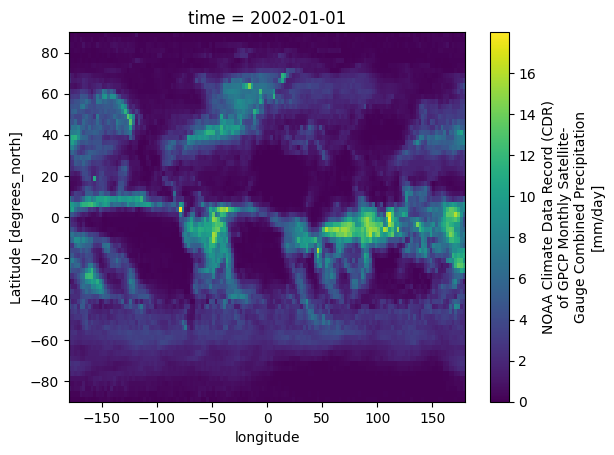

In [10]:
da_precip[0, :, :].plot()

An alternative to the built-in Xarray plotting functions is to make use of a combination of the plotting libraries [matplotlib](https://matplotlib.org/) and [Cartopy](https://scitools.org.uk/cartopy/docs/latest/). One of Cartopy’s key features is its ability to transform array data into different geographic projections. In combination with matplotlib, it is a very powerful way to create high-quality visualisations and animations. In later plots, we will make use of these libraries to produce more customised visualisations.

## 3. Climatology of precipitations

In this section we will analyse the time averaged global and seasonal climatological distributions of GIRAFE precipitation as well as the monthly mean climatology.

### 3.1. Time averaged global climatological distribution of precipitations

Let us calculate the mean climatology of precipitations for the time period January 2002 to December 2022.


First we have to select the specific time range by using the Xarray method `sel` that indexes the data and dimensions by the appropriate indexers.
Then, we apply the method `mean` to calculate the mean along the time dimension.

In [11]:
# Select the precip data for the whole time period
precip = da_precip.sel(time=slice('2002-01-01', '2021-12-31'))

# Calculate the mean along the time dimension
precip_mean = precip.mean(dim='time')

We can now visualize the global mean climatological distribution of precipitations for the period January 2002 - December 2022. This time, we will make use of a combination of the plotting libraries [Matplotlib](https://matplotlib.org/stable/index.html) and [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) to create a more customised figure. 

<>:9: SyntaxWarning: invalid escape sequence '\ '
<>:9: SyntaxWarning: invalid escape sequence '\ '
/var/folders/kx/ksg5wbrj1sq95rp2tz_72j6c0000gn/T/ipykernel_1251/2809573362.py:9: SyntaxWarning: invalid escape sequence '\ '
  '$\\bf{Climatology\ of\ Precipitations\ from\ GIRAFE\ (January\ 2002\ -\ December\ 2022)}$',


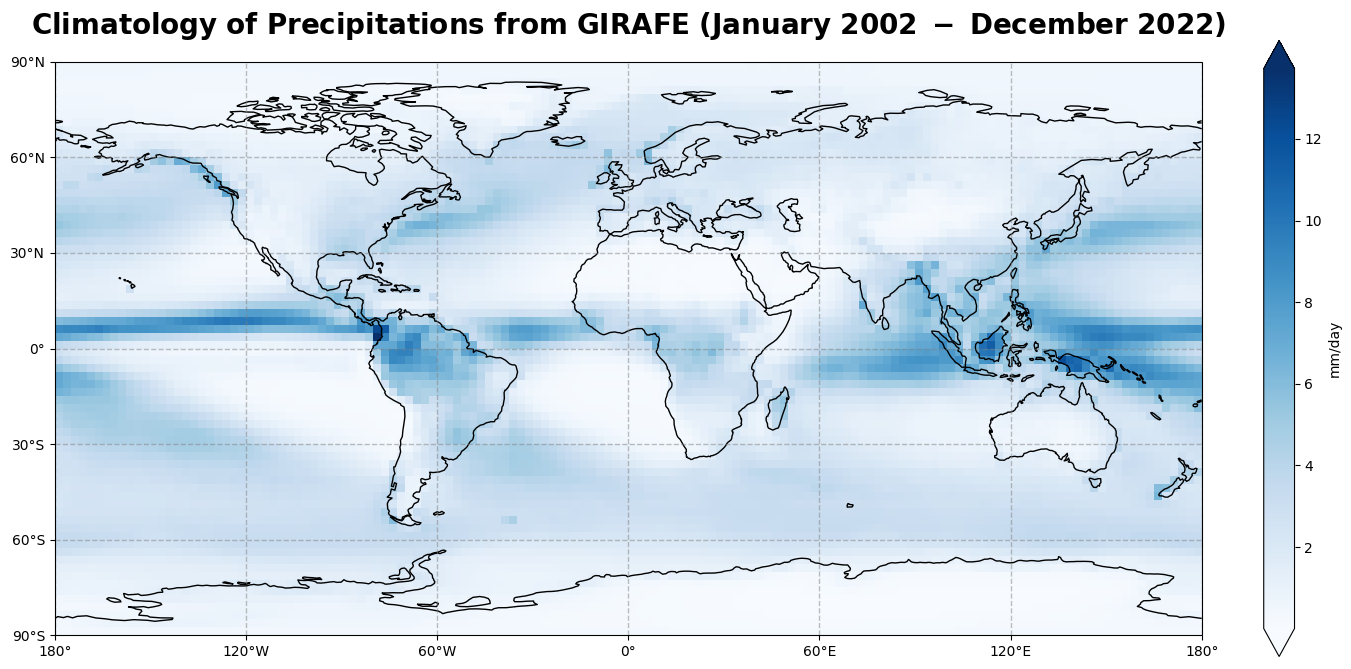

In [12]:
# Create the figure panel and the map using the Cartopy PlateCarree projection
fig1, ax1 = plt.subplots(1, 1, figsize=(16, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data
im = plt.pcolormesh(precip_mean.longitude, precip_mean.latitude, precip_mean, cmap='Blues')

# Set the figure title, add lat/lon grid and coastlines
ax1.set_title(
    '$\\bf{Climatology\ of\ Precipitations\ from\ GIRAFE\ (January\ 2002\ -\ December\ 2022)}$',
    fontsize=20,
    pad=20)
# Add coastlines
ax1.coastlines(color='black')
# Define gridlines and ticks
ax1.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
# Gridlines
gl = ax1.gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--')

# Specify the colorbar
cbar = plt.colorbar(im, fraction=0.025, pad=0.05, extend='both')
cbar.set_label('mm/day')

# Save the figure
fig1.savefig(f'{DATADIR}girafe_precip_climatology.png')

**Figure 1** shows the global climatological distribution of precipitations for the time period of January 2002 - December 2022 over ocean and land.

The global climatological field of precipitations has a dominant structure along the equator, over water masses and rain forests like Amazonia. Most of the evaporation or evapotranspiration takes place in the tropics. Indeed, Solar irradiance and its relative position on the Earth's surface (solar zenith angle) controls evaporation, leading to the transition of water from the liquid phase to the gaseous phase, which is subsequently advected to higher altitudes and then condensated into precipitations. This mechanism is the main driver of the Inter-Tropical Convergence Zone (ITCZ) along the equator.


There are also moderately high values of daily accumulated precipitation amounts in the region of the Gulf Stream extension and the Kuroshio, the East of Japan, in association with the storm track regions.

### 3.2. Time averaged seasonal climatological distribution of precipitations

Now, let us have a look at the seasonal climatological distribution of GIRAFE precipitations. <br>
For this purpose, we will use the `groupby()` method, with `'time.season'` as an argument, to split the data according to the seasons, and then average them over the years. <br>
Seasons are defined as follows:
- NH spring: March, April, May
- NH summer: June, July, August
- NH autumn: September, October, November
- NH winter: December, January, February

In [13]:
# Split data array precip by season
precip_seasonal_climatology = precip.groupby('time.season').mean('time')
precip_seasonal_climatology

<xarray.DataArray 'precip' (season: 4, latitude: 72, longitude: 144)> Size: 166kB
array([[[0.08378538, 0.08694268, 0.08567452, ..., 0.07851867,
         0.07955979, 0.08055369],
        [0.22703737, 0.24997877, 0.2663659 , ..., 0.18418209,
         0.19969414, 0.20851502],
        [0.47865668, 0.46121988, 0.43781102, ..., 0.41263554,
         0.42632726, 0.44193366],
        ...,
        [0.2748989 , 0.2715117 , 0.26802307, ..., 0.27158993,
         0.2754851 , 0.2790338 ],
        [0.32083976, 0.31501037, 0.3229669 , ..., 0.331399  ,
         0.33037892, 0.32422894],
        [0.37933046, 0.3843187 , 0.39757586, ..., 0.38698584,
         0.382226  , 0.39605647]],

       [[0.6666286 , 0.6679451 , 0.67232335, ..., 0.64030045,
         0.64665157, 0.6548042 ],
        [0.6516537 , 0.6642757 , 0.7057746 , ..., 0.6034295 ,
         0.61047924, 0.6264639 ],
        [0.7755435 , 0.73903   , 0.7329751 , ..., 0.7320059 ,
         0.75836986, 0.7715568 ],
...
        [0.18830982, 0.1831712 , 0.18762517, ..., 0.196954  ,
         0.20112035, 0.19194171],
        [0.19917783, 0.196755  , 0.19910713, ..., 0.19473591,
         0.19439492, 0.19818273],
        [0.21848688, 0.21638305, 0.22221468, ..., 0.22815135,
         0.22072028, 0.2205966 ]],

       [[0.46207696, 0.49192315, 0.4854178 , ..., 0.45550954,
         0.4601473 , 0.46104252],
        [0.5195012 , 0.5313439 , 0.5671564 , ..., 0.45138785,
         0.47643948, 0.4811358 ],
        [0.67451125, 0.6404502 , 0.6134273 , ..., 0.6388281 ,
         0.657259  , 0.6633493 ],
        ...,
        [0.5736894 , 0.5687822 , 0.57277226, ..., 0.6018333 ,
         0.60407573, 0.59024173],
        [0.6592604 , 0.6450915 , 0.6500613 , ..., 0.6453093 ,
         0.6504158 , 0.6509038 ],
        [0.6907839 , 0.65824133, 0.68298477, ..., 0.6763969 ,
         0.67991626, 0.7013886 ]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 288B -88.75 -86.25 -83.75 ... 86.25 88.75
  * longitude  (longitude) float32 576B -178.8 -176.2 -173.8 ... 176.2 178.8
  * season     (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    long_name:      NOAA Climate Data Record (CDR) of GPCP Monthly Satellite-...
    standard_name:  precipitation amount
    units:          mm/day
    valid_range:    [  0. 100.]
    cell_methods:   area: mean time: mean

The xarray `DataArray` **"precip_seasonal_climatology"** has four entries in the time dimension (one for each season). The climatological distribution of precipitations can now be plotted for each season.

<>:48: SyntaxWarning: invalid escape sequence '\ '
<>:48: SyntaxWarning: invalid escape sequence '\ '
/var/folders/kx/ksg5wbrj1sq95rp2tz_72j6c0000gn/T/ipykernel_1251/3313841066.py:48: SyntaxWarning: invalid escape sequence '\ '
  fig2.suptitle('$\\bf{Seasonal\ climatology\ of\ Precipitation\ (January\ 2002\ -\ December\ 2021)}$',


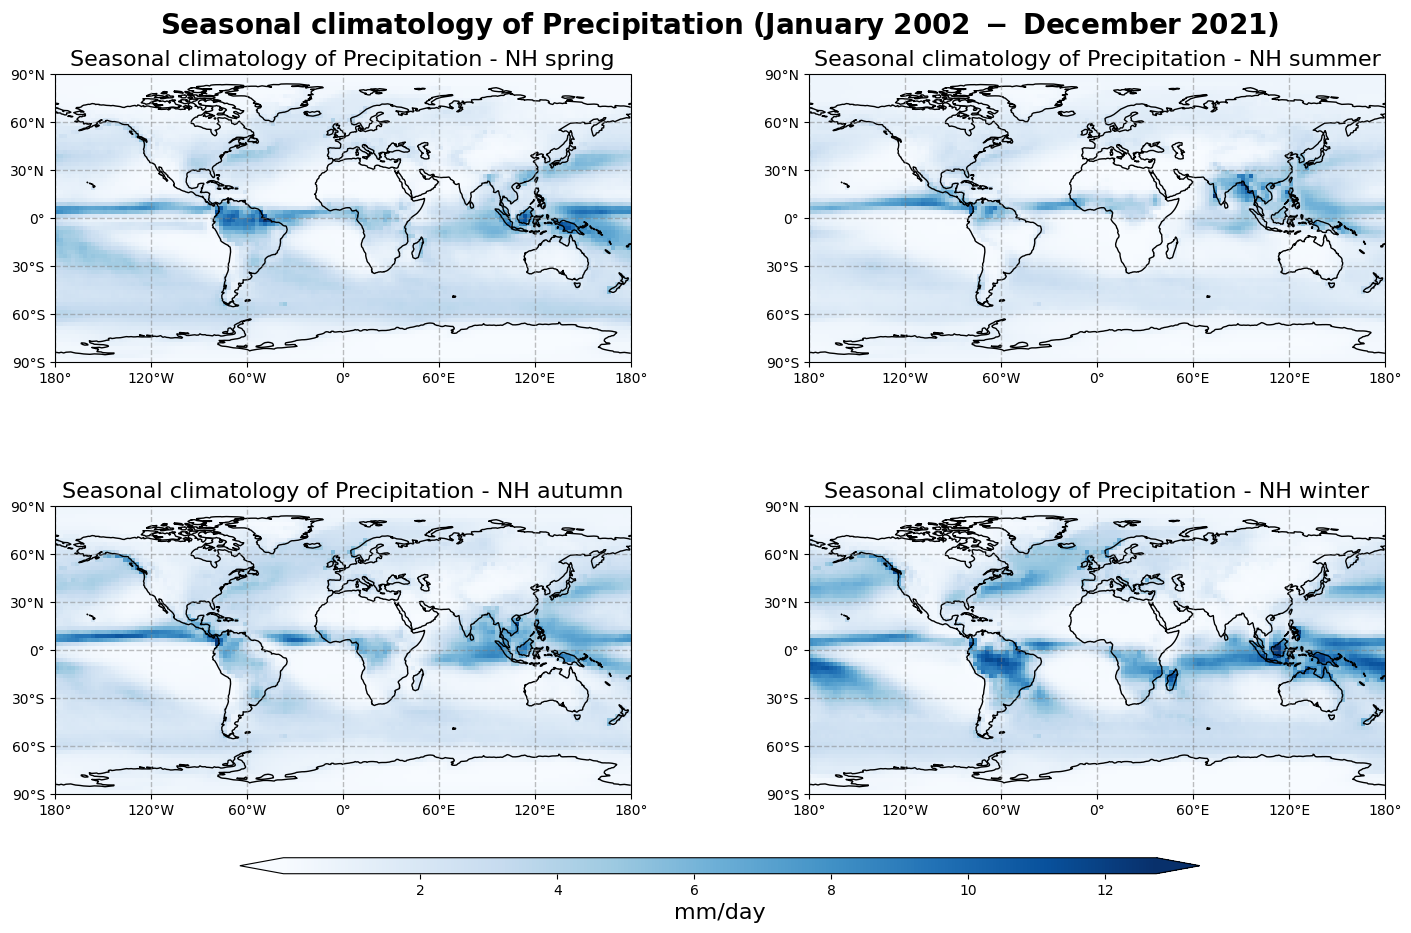

In [14]:
# Create a list of the seasons such as defined in the dataset precip_seasonal_climatology:
seasons = ['MAM', 'JJA', 'SON', 'DJF']

# We use the "subplots" to place multiple plots according to our needs. 
# In this case, we want 4 plots in a 2x2 format.
# For this "nrows" = 2 and "ncols" = 2, the projection and size are defined as well
fig2, ax2 = plt.subplots(nrows=2,
                         ncols=2,
                         subplot_kw={'projection': ccrs.PlateCarree()},
                         figsize=(16,8))

# Define a dictionary of subtitles, each one corresponding to a season
subtitles = {'MAM': 'NH spring', 'JJA': 'NH summer', 'SON': 'NH autumn', 'DJF': 'NH winter'}

# Configure the axes and subplot titles
for i_season, c_season in enumerate(seasons):
    # convert i_season index into (row, col) index
    row = i_season // 2
    col = i_season % 2
    # Plot data (coordinates and data) and define colormap
    im = ax2[row][col].pcolormesh(precip_seasonal_climatology.longitude,
                                  precip_seasonal_climatology.latitude,
                                  precip_seasonal_climatology.sel(season=c_season),
                                  cmap='Blues')
    # Set title and size
    ax2[row][col].set_title('Seasonal climatology of Precipitation - ' + subtitles[c_season], fontsize=16)
    # Add coastlines
    ax2[row][col].coastlines()
    # Define grid lines and ticks (e.g. from -180 to 180 in an interval of 60)
    ax2[row][col].set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
    ax2[row][col].set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax2[row][col].xaxis.set_major_formatter(lon_formatter)
    ax2[row][col].yaxis.set_major_formatter(lat_formatter)
    # Gridline
    gl = ax2[row][col].gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--')

# Place the subplots
fig2.subplots_adjust(bottom=0.0, top=0.9, left=0.05, right=0.95, wspace=0.1, hspace=0.5)

# Define and place a colorbar at the bottom
cbar_ax = fig2.add_axes([0.2, -0.1, 0.6, 0.02])
cbar = fig2.colorbar(im, cax=cbar_ax, orientation='horizontal', extend='both')
cbar.set_label('mm/day', fontsize=16)

# Define an overall title
fig2.suptitle('$\\bf{Seasonal\ climatology\ of\ Precipitation\ (January\ 2002\ -\ December\ 2021)}$',
              fontsize=20)

# Save the figure
fig2.savefig(f'{DATADIR}girafe_precip_seasonal_climatology.png')

**Figure 2** shows the seasonal mean climatology of the precipitation field from Northern Hemisphere spring to winter (top left to bottom right panels) derived from GIRAFE.

The general pattern is overall the same as in **Figure 1** with higher values in the tropics and lower values in the extra tropics. The band of high amount of precipitations (particularly noticeable between South-East Asia and North Australia) oscillates around the equator, reaching its highest values in the Summer Hemisphere, which confirms the dominant influence of the solar radiation over the course of the inter-tropical convergence zone.

### 3.3. Zonally averaged montly mean climatology of precipitations

Let us now calculate the zonally averaged monthly mean climatology of precipitations over the time period January 2002 - December 2022, and visualise it in the form of a Hovmöller diagram. <br> 
A Hovmöller diagram is a common way of plotting meteorological or climatological data to depict their changes over time as a function of latitude or longitude. In our case, time will be recorded along the abscissa and latitude along the ordinate.


First, we will apply the `groupby()` method to group the **"precip"** `DataArray` by month, and then we will compute the average for each monthly group and longitude band.


The resulting data array is the zonally averaged monthly mean climatology for GIRAFE precipitations based on reference January 2002 - December 2022.

In [15]:
precip_clim_month = precip.groupby('time.month').mean("time")
precip_clim_month

<xarray.DataArray 'precip' (month: 12, latitude: 72, longitude: 144)> Size: 498kB
array([[[0.04089779, 0.04212464, 0.04435325, ..., 0.04019174,
         0.03842245, 0.03932952],
        [0.19387111, 0.21284449, 0.23540716, ..., 0.1445673 ,
         0.15903176, 0.17002152],
        [0.50598013, 0.46913967, 0.46678004, ..., 0.4361631 ,
         0.44955087, 0.47205657],
        ...,
        [0.31329176, 0.30478066, 0.2961498 , ..., 0.30378133,
         0.30464095, 0.3038826 ],
        [0.35983652, 0.3585793 , 0.3650772 , ..., 0.36637768,
         0.36269516, 0.36027983],
        [0.4480146 , 0.44527006, 0.45127258, ..., 0.46166316,
         0.44871873, 0.4658659 ]],

       [[0.07845009, 0.07956676, 0.07645454, ..., 0.06732261,
         0.07002763, 0.0711742 ],
        [0.26493162, 0.30654636, 0.3112168 , ..., 0.22707221,
         0.2477433 , 0.25305402],
        [0.51109177, 0.54534173, 0.48896518, ..., 0.4435982 ,
         0.46282482, 0.47762743],
...
        [0.36266357, 0.35326397, 0.33543596, ..., 0.37387246,
         0.37750882, 0.36683473],
        [0.40177274, 0.37094745, 0.38636774, ..., 0.3894915 ,
         0.3862862 , 0.3788486 ],
        [0.46617752, 0.45835716, 0.5278475 , ..., 0.4925205 ,
         0.47275513, 0.46434116]],

       [[0.13200824, 0.13913664, 0.13621582, ..., 0.12804171,
         0.13022926, 0.13115737],
        [0.22230932, 0.23054537, 0.25247365, ..., 0.18090688,
         0.19230732, 0.20246938],
        [0.41889817, 0.3691783 , 0.35768783, ..., 0.3581454 ,
         0.36660612, 0.376117  ],
        ...,
        [0.26744738, 0.25157398, 0.24569252, ..., 0.28301185,
         0.278462  , 0.2889535 ],
        [0.32236686, 0.3169437 , 0.31269708, ..., 0.33117288,
         0.33690423, 0.32437283],
        [0.37598854, 0.3795376 , 0.3769073 , ..., 0.37709957,
         0.37930423, 0.40384644]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 288B -88.75 -86.25 -83.75 ... 86.25 88.75
  * longitude  (longitude) float32 576B -178.8 -176.2 -173.8 ... 176.2 178.8
  * month      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:      NOAA Climate Data Record (CDR) of GPCP Monthly Satellite-...
    standard_name:  precipitation amount
    units:          mm/day
    valid_range:    [  0. 100.]
    cell_methods:   area: mean time: mean

Let us view the zonal monthly climatology of the precipitation field. To do this, we will average across the longitude bands with the `mean()` method, align the time dimension coordinate with the x axis and the lat dimension coordinate along the y axis using the method `transpose()`...

In [16]:
precip_zonal_clim_month = precip_clim_month.mean(dim="longitude").transpose()
precip_zonal_clim_month

<xarray.DataArray 'precip' (latitude: 72, month: 12)> Size: 3kB
array([[0.02968374, 0.03818371, 0.08023754, 0.17898142, 0.40567195,
        0.44275203, 0.6004572 , 0.81871027, 0.6766618 , 0.44764954,
        0.19814707, 0.10775072],
       [0.10021942, 0.12416714, 0.18588552, 0.26733863, 0.44577736,
        0.47305644, 0.57177156, 0.72166514, 0.6534915 , 0.43739527,
        0.25434658, 0.15085955],
       [0.15927604, 0.15726179, 0.21951884, 0.28838807, 0.44460237,
        0.47733867, 0.53810734, 0.6310734 , 0.6168309 , 0.41594583,
        0.24412553, 0.15461902],
       [0.18428859, 0.17694877, 0.2290899 , 0.28782344, 0.4005004 ,
        0.46402937, 0.514291  , 0.5849621 , 0.5619362 , 0.3932741 ,
        0.26007998, 0.16672823],
       [0.31115395, 0.30710018, 0.3436271 , 0.3778039 , 0.50666785,
        0.5937823 , 0.62517923, 0.71558875, 0.6839078 , 0.5141262 ,
        0.3876014 , 0.268643  ],
       [0.56590796, 0.6101494 , 0.55535793, 0.5232618 , 0.6692232 ,
        0.7140827 , 0.78487736, 0.8822935 , 0.87843686, 0.68508005,
        0.5594254 , 0.45530468],
       [0.72497964, 0.8791049 , 0.78298396, 0.62935764, 0.7429788 ,
        0.739234  , 0.8124409 , 0.9154178 , 0.9040275 , 0.7662218 ,
...
        0.78508836, 1.1355491 , 1.4631208 , 1.5144175 , 1.464179  ,
        1.2461858 , 1.1028024 ],
       [0.82992864, 0.8045677 , 0.633566  , 0.4943899 , 0.45890772,
        0.7201526 , 1.0778595 , 1.3857038 , 1.3912215 , 1.1879281 ,
        0.9594114 , 0.8390207 ],
       [0.5952527 , 0.57311887, 0.450018  , 0.34640184, 0.34599888,
        0.6372985 , 0.96122104, 1.262765  , 1.2173522 , 0.9595194 ,
        0.7383313 , 0.5863044 ],
       [0.54974884, 0.5284508 , 0.39166462, 0.3011251 , 0.33437982,
        0.66094744, 0.87793803, 1.1195571 , 1.0413464 , 0.7920181 ,
        0.6292447 , 0.5404376 ],
       [0.454772  , 0.4165535 , 0.27391723, 0.20820804, 0.29293162,
        0.66308904, 0.83308196, 1.0059867 , 0.8483016 , 0.6589797 ,
        0.5085383 , 0.46125937],
       [0.4521399 , 0.36765334, 0.2371992 , 0.17878816, 0.26328605,
        0.6840673 , 0.84289205, 1.0565135 , 0.9140569 , 0.6282257 ,
        0.47656897, 0.4156251 ],
       [0.51892513, 0.34763727, 0.26285556, 0.17234637, 0.24663785,
        0.7408166 , 0.8486955 , 1.1272058 , 0.9559997 , 0.6271413 ,
        0.47914803, 0.4209041 ]], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * month     (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

Now we can plot our data. Before we do this however, we define the min, max and step of contours that we will use in a contour plot.

In [17]:
vdiv = 0.1
vmin = 0
vmax = 10
clevs = np.arange(vmin, vmax, vdiv)

<>:9: SyntaxWarning: invalid escape sequence '\ '
<>:9: SyntaxWarning: invalid escape sequence '\ '
/var/folders/kx/ksg5wbrj1sq95rp2tz_72j6c0000gn/T/ipykernel_1251/805071406.py:9: SyntaxWarning: invalid escape sequence '\ '
  '$\\bf{Zonally\ averaged\ monthly\ climatology\ of\ Precipitations\ (January\ 2002\ -\ December\ 2022)}$',


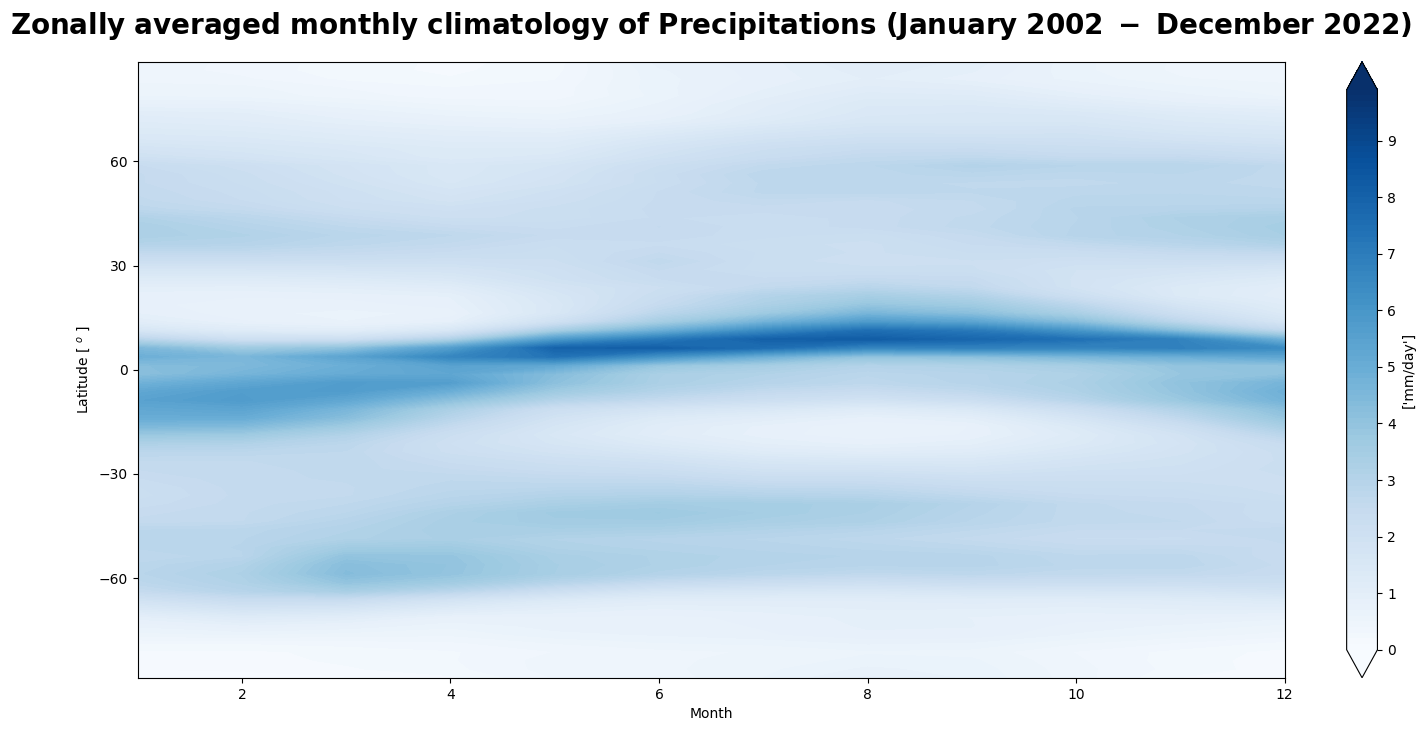

In [18]:
# Define the figure and specify size
fig3, ax3 = plt.subplots(1, 1, figsize=(16, 8))

# Configure the axes and figure title
ax3.set_xlabel('Month')
ax3.set_ylabel('Latitude [ $^o$ ]')
ax3.set_yticks(np.arange(-90, 91, 30))
ax3.set_title(
    '$\\bf{Zonally\ averaged\ monthly\ climatology\ of\ Precipitations\ (January\ 2002\ -\ December\ 2022)}$',
    fontsize=20,
    pad=20)

# As the months (12) are much less than the latitudes (180),
# we need to ensure the plot fits into the size of the figure.
ax3.set_aspect('auto')

# Plot the data as a contour plot
contour = ax3.contourf(precip_zonal_clim_month.month,
                       precip_zonal_clim_month.latitude,
                       precip_zonal_clim_month,
                       levels=clevs,
                       cmap='Blues',
                       extend='both')

# Specify the colorbar
cbar = plt.colorbar(contour, fraction=0.025, pad=0.05)
cbar.set_label(['mm/day'])

# Save the figure
fig3.savefig(f'{DATADIR}girafe_precip_monthly_climatology.png')

**Figure 3** shows the seasonal motion of the precipitation band crossing the equator from boreal summer to austral summer, associated with the ITCZ and the Rain Season.

In the next use case, we will anlyse the temporal evolution of the precipitation amount and its annual seasonal variation.

## 4. Time series and trend analysis of precipitations

After looking at the time averaged global distribution of precipitations, we further investigate the dataset. The GIRAFE product spans over 20 years of satellite observations, and another useful way of analysing and visualizing the temporal evolution of rainfall accumulated precipitation amounts is using the time series. We will calculate global time series, plot it, and discuss most important features.

### 4.1. Global time series of precipitations

We first create a temporal subset for the period January 2002 to December 2021.

In [19]:
# Select time period
precip_girafe = da_precip.sel(time=slice('2002-01-01', '2021-12-31'))
precip_girafe

<xarray.DataArray 'precip' (time: 240, latitude: 72, longitude: 144)> Size: 10MB
[2488320 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 288B -88.75 -86.25 -83.75 ... 86.25 88.75
  * time       (time) datetime64[ns] 2kB 2002-01-01 2002-02-01 ... 2021-12-01
  * longitude  (longitude) float32 576B -178.8 -176.2 -173.8 ... 176.2 178.8
Attributes:
    long_name:      NOAA Climate Data Record (CDR) of GPCP Monthly Satellite-...
    standard_name:  precipitation amount
    units:          mm/day
    valid_range:    [  0. 100.]
    cell_methods:   area: mean time: mean

#### 4.1.1. Spatial aggregation

We would like to visualise these data, not in maps but as one dimensional time series of global average values. To do this, we will first need to aggregate the data spatially to create a single global average at each time step. In order to aggregate over the latitudinal dimension, we need to take into account the variation in area as a function of latitude. We will do this by using the cosine of the latitude as a proxy:

In [20]:
weights = np.cos(np.deg2rad(precip_girafe.latitude))
weights.name = "weights"
precip_girafe_weighted = precip_girafe.weighted(weights)

The next step is to compute the mean across the latitude and longitude dimensions of the weighted data array with the `mean()` method.

In [21]:
precip_weighted_mean = precip_girafe_weighted.mean(dim=("latitude", "longitude"))

#### 4.1.2. Plot data

Now we can plot the time series of globally averaged GIRAFE precipitation data over time using the `plot()` method.


<>:8: SyntaxWarning: invalid escape sequence '\ '
<>:8: SyntaxWarning: invalid escape sequence '\ '
/var/folders/kx/ksg5wbrj1sq95rp2tz_72j6c0000gn/T/ipykernel_1251/92207744.py:8: SyntaxWarning: invalid escape sequence '\ '
  ax4.set_title('$\\bf{Global\ time\ series\ of\ daily\ accumulated\ precipitation\ amount}$', fontsize=20, pad=20)


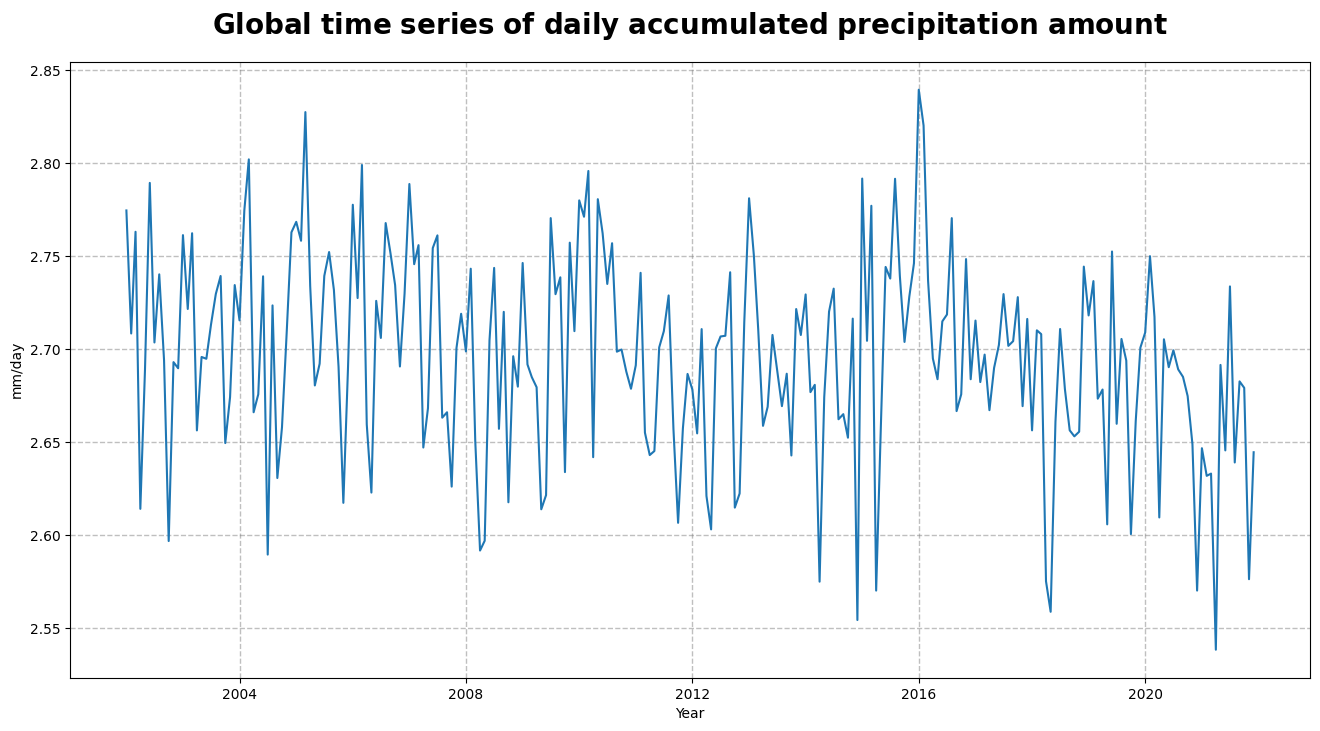

In [22]:
# Define the figure and specify size
fig4, ax4 = plt.subplots(1, 1, figsize=(16, 8))

# Configure the axes and figure title
ax4.set_xlabel('Year')
ax4.set_ylabel('mm/day')
ax4.grid(linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax4.set_title('$\\bf{Global\ time\ series\ of\ daily\ accumulated\ precipitation\ amount}$', fontsize=20, pad=20)

# Plot the data
ax4.plot(precip_weighted_mean.time, precip_weighted_mean)

# Save the figure
fig4.savefig(f'{DATADIR}girafe_precip_global_timeseries.png')

**Figure 4**, shows the time series of the daily accumulated precipitation amount. From the time series, we can infer the seasonal pattern along with a (decreasing) trend in the global space and time averaged global interpolated rainfall estimation.

We will now procede to the seasonal decomposition of the total column water vapour to study this trend in more details.

### 4.2. Trend analysis and seasonal cycle of precipitation

The time series can be further analysed by extracting the trend, or the running annual mean, and the seasonal cycle.

To this end, we will convert the Xarray `DataArray` into a time series with the [pandas](https://pandas.pydata.org/) library. Then we will decompose it into the trend, the seasonal cycle and the residuals by using the `seasonal_decompose()` method. Finally, we will visualize the results.

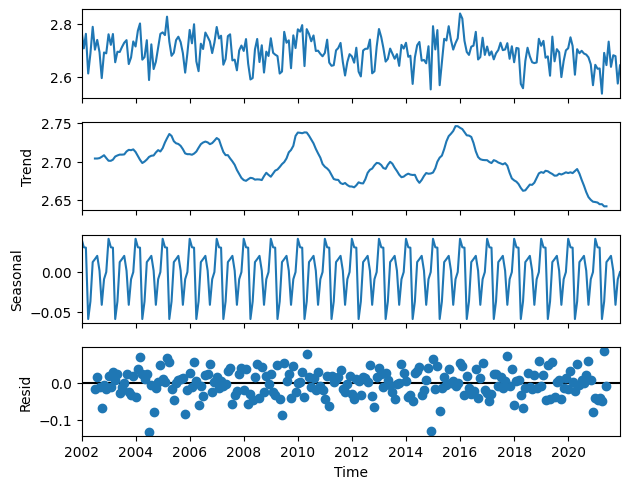

In [23]:
# Convert the Xarray data array precip_weighted_mean into a time series
precip_weighted_mean_series = pd.Series(precip_weighted_mean)
# Define the time dimension of tcwv_weighted_mean as the index of the time series
precip_weighted_mean_series.index = precip_weighted_mean.time.to_dataframe().index

# Decomposition of the time series into the trend, the seasonal cycle and the residuals
precip_seasonal_decomposition = seasonal_decompose(precip_weighted_mean_series,
                                                   model='additive',
                                                   period=12)

# Plot the resulting seasonal decomposition
precip_seasonal_decomposition.plot()
plt.xlabel("Time")
plt.savefig(f'{DATADIR}girafe_precip_timeseries_climatology.png')

**Figure 5** shows the decomposition of the GIRAFE daily accumulated precipitation time series into the trend (2nd panel) and the seasonal cycle (3rd panel), from which are derived the anomalies or de-trended and de-seasonalised time series that have the characteristics of uncorrelated noise pattern (4th panel).

The trend analysis presents two peaks around the years 2010 and 2016, which can be related respectively to a moderate “El Niño” event in 2009-10 and a strong one in 2015-16. The combination of strong “El Niño” events and higher overall trends might lead to extremes in the precipitation amount in the future, and the decreasing trend shall be further examined too.

### 4.3. Regional time series and trend analysis

We can also use the GIRAFE dataset to visualise and analyse the temporal evolution of precipitations over some regions of interest that have a specific regime, like, for example, the Rain Forest of Amazon in Brasil, the semi-arid region of Sahel in Africa, India for Monsoon, or Indonesia that is located in the Warm Pool.


For this purpose, we will re-use the code from the previous section, but we will need to add one additional step: select the corresponding regions by their repective coordinates from the original global dataset.

In [24]:
# Select the specific regions
precip_amazon = precip_girafe.sel(latitude=slice(-15, 0), longitude=slice(-75, -60))
precip_sahel = precip_girafe.sel(latitude=slice(10, 20), longitude=slice(-15, 30))
precip_india = precip_girafe.sel(latitude=slice(0, 30), longitude=slice(60, 90))
precip_indonesia = precip_girafe.sel(latitude=slice(-15, 15), longitude=slice(90, 150))

# Spatial aggregation
# Apply weights
precip_amazon_weighted = precip_amazon.weighted(weights)
precip_sahel_weighted = precip_sahel.weighted(weights)
precip_india_weighted = precip_india.weighted(weights)
precip_indonesia_weighted = precip_indonesia.weighted(weights)
# Compute weighted mean
precip_amazon_wmean = precip_amazon_weighted.mean(dim=('latitude', 'longitude'))
precip_sahel_wmean = precip_sahel_weighted.mean(dim=('latitude', 'longitude'))
precip_india_wmean = precip_india_weighted.mean(dim=('latitude', 'longitude'))
precip_indonesia_wmean = precip_indonesia_weighted.mean(dim=('latitude', 'longitude'))

This time, to analyse and visualise the trend over the time period of the GIRAFE dataset, we will compute the running annual mean by using the `rolling` method for each region.

In [25]:
# Compute the rolling mean for each region
precip_amazon_rmean = precip_amazon_wmean.rolling(time=12, center=True).mean()
precip_sahel_rmean = precip_sahel_wmean.rolling(time=12, center=True).mean()
precip_india_rmean = precip_india_wmean.rolling(time=12, center=True).mean()
precip_indonesia_rmean = precip_indonesia_wmean.rolling(time=12, center=True).mean()

# Creation of a dataset with the rolling mean for each region
precip_region_rmean = xr.Dataset(data_vars=dict(BRZL=precip_amazon_rmean,
                                                SAHEL=precip_sahel_rmean,
                                                IND=precip_india_rmean,
                                                IDSA=precip_indonesia_rmean
                                               ),
                                 coords=dict(time=precip_amazon_rmean.time),
                                )

We can now plot the resulting time series of precipitation for each region.

<>:30: SyntaxWarning: invalid escape sequence '\ '
<>:30: SyntaxWarning: invalid escape sequence '\ '
/var/folders/kx/ksg5wbrj1sq95rp2tz_72j6c0000gn/T/ipykernel_1251/2514110224.py:30: SyntaxWarning: invalid escape sequence '\ '
  fig5.suptitle('$\\bf{Regional\ time\ series\ of\ daily\ accumulated\ precipitation\ amount}$',


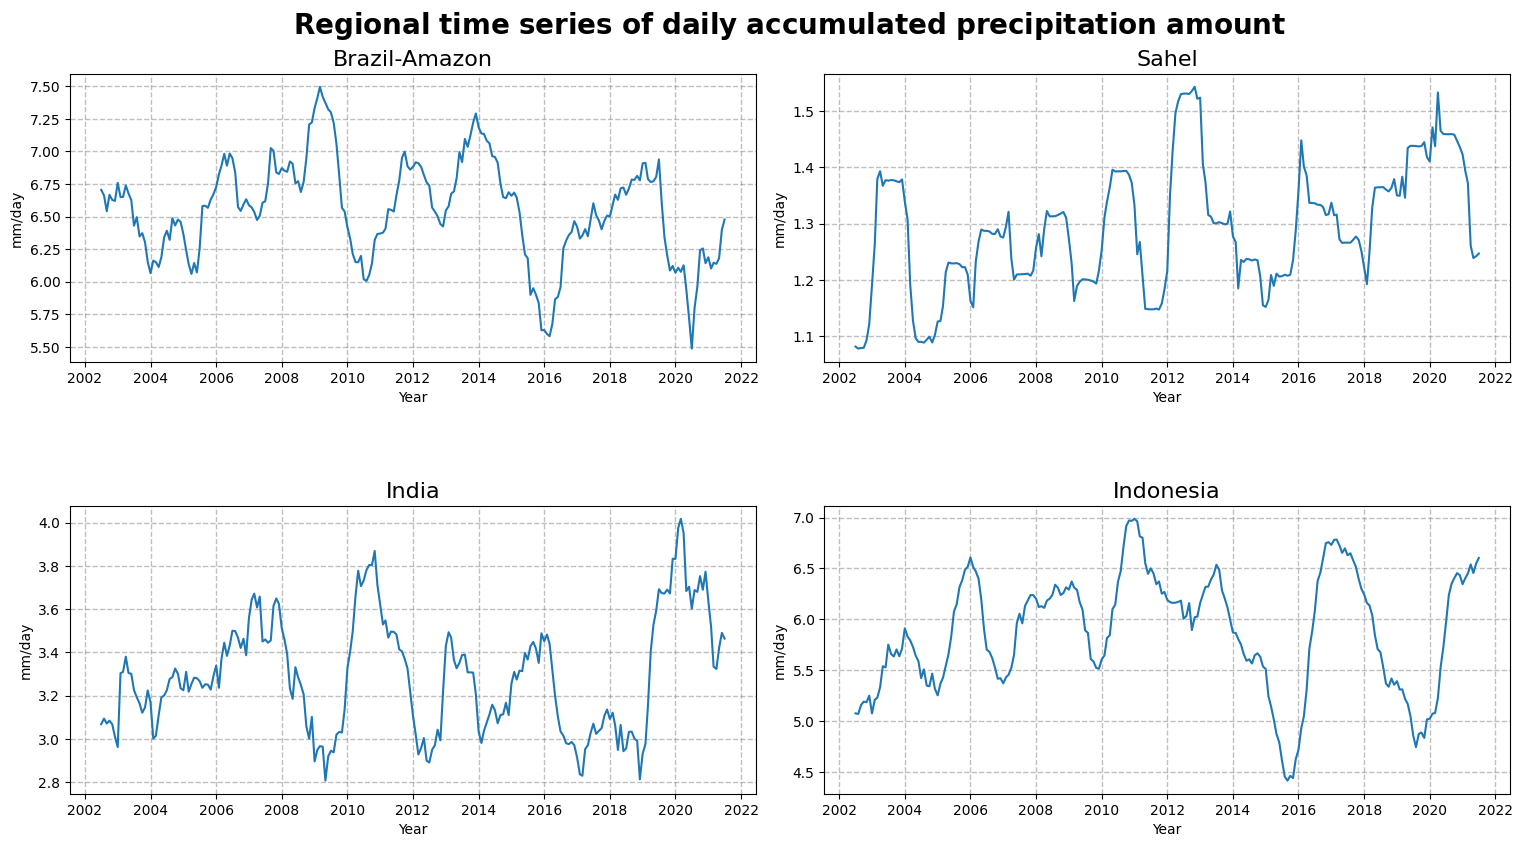

In [26]:
# Create a list of the regions of interest:
regions = ['BRZL', 'SAHEL', 'IND', 'IDSA']

# We use the "subplots" to place multiple plots according to our needs. 
# In this case, we want 4 plots in a 2x2 format.
# For this "nrows" = 2 and "ncols" = 2, the projection and size are defined as well
fig5, ax5 = plt.subplots(nrows=2,
                         ncols=2,
                         figsize=(16,8))

# Define a dictionary of subtitles, each one corresponding to a season
subtitles = {'BRZL': 'Brazil-Amazon', 'SAHEL': 'Sahel', 'IND': 'India', 'IDSA': 'Indonesia'}

# Configure the axes and subplot titles
for i_region, c_region in enumerate(regions):
    # convert i_season index into (row, col) index
    row = i_region // 2
    col = i_region % 2
    ax5[row][col].set_xlabel('Year')
    ax5[row][col].set_ylabel('mm/day')
    ax5[row][col].grid(linewidth=1, color='gray', alpha=0.5, linestyle='--')
    ax5[row][col].set_title(subtitles[c_region], fontsize=16)
    # Plot the data
    ax5[row][col].plot(precip_region_rmean.time, precip_region_rmean[c_region])
    
# Place the subplots
fig5.subplots_adjust(bottom=0.0, top=0.9, left=0.05, right=0.95, wspace=0.1, hspace=0.5)

# Define an overall title
fig5.suptitle('$\\bf{Regional\ time\ series\ of\ daily\ accumulated\ precipitation\ amount}$',
              fontsize=20)

# Save the figure
fig5.savefig(f'{DATADIR}girafe_precip_regional_timeseries.png')

**Figure 6** shows the temporal evolution of precipitations over Brazil, Sahel, India and Indonesia for the time period 2002-2022. Over the last decades, the Rain Forest of Amazon tends to be dryer and the region of Sahel wetter. In the last decade, extreme values of precipitation that could lead to droughts or floods tend to increase over India or Indonesia.

## 5. Conclusion

In this notebook we have provided some use cases, based on the global interpolated rainfall estimation (GIRAFE) Precipitation product to illustrate the way this dataset can be used to study, analyse and visualise this essential climate variable. The high values found along the equator can be explained by the Inter-Tropical Convergence Zone and the moderately high values observed in the region of the Gulf Stream extension and Kurushio are associated to the storm track regions. Comparisons with other independent datasets can be made to further investigate trends (like more frequent episodes of floods and droughts) that can be attributed to global climate change, El-Niño events, etc.